In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
train_data_dir = '/content/drive/MyDrive/train'
test_data_dir = '/content/drive/MyDrive/test'


In [5]:
img_width = 150
img_height = 150
batch_size = 16


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [7]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2199 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 659s 5s/step - accuracy: 0.7336 - loss: 0.5187 - val_accuracy: 0.8281 - val_loss: 0.3942
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 385ms/step - accuracy: 0.6875 - loss: 0.4541 - val_accuracy: 0.8333 - val_loss: 0.3968
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 681s 5s/step - accuracy: 0.7546 - loss: 0.5035 - val_accuracy: 0.8125 - val_loss: 0.4003
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 585ms/step - accuracy: 0.8750 - loss: 0.3276 - val_accuracy: 0.8229 - val_loss: 0.3985
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 682s 5s/step - accuracy: 0.7627 - loss: 0.4846 - val_accuracy: 0.8281 - val_loss: 0.3940
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 80s 552ms/step - accuracy: 0.8750 - loss: 0.4706 - val_accuracy: 0.8281 - val_loss: 0.4048
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 700s 5s/step - accuracy: 0.7757 - loss: 0.4673 - val_accuracy: 0.8177 - val_loss: 0.4050
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 392ms/step - accuracy: 0.8125 - loss: 0.3110 - 

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.8119 - loss: 0.3890
Validation Loss: 0.3801034092903137
Validation Accuracy: 0.824999988079071


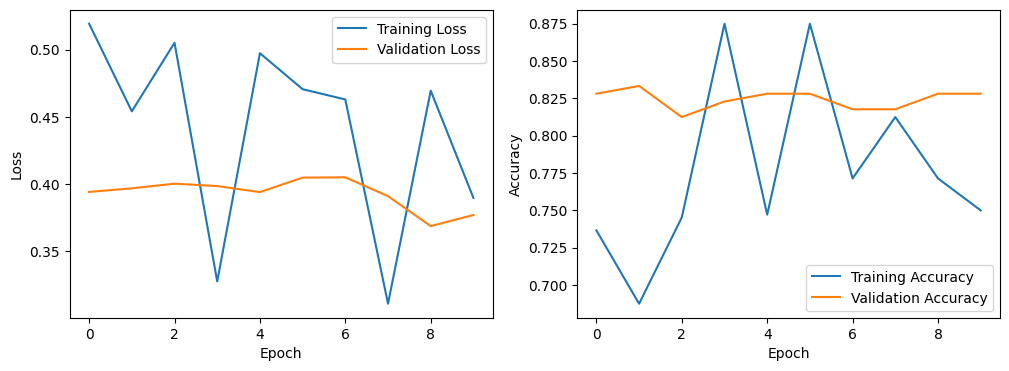

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()